In [15]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Frist thing to do is to create a Dataframe out of the feature names and then add a target variable column to the DataFrame

In [23]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [32]:
df['flower name'] = df.target.apply([lambda x: iris.target_names[x]])
df.head(
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now let's do some visualization of the Datafame


Text(0, 0.5, 'sepal width (cm)')

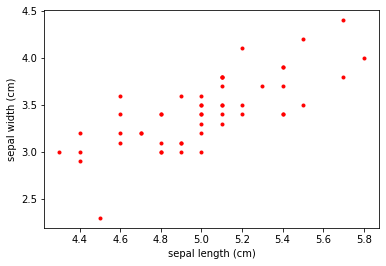

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'red', marker = '.')
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color= 'blue', marker = '.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')







Text(0, 0.5, 'petal width (cm)')

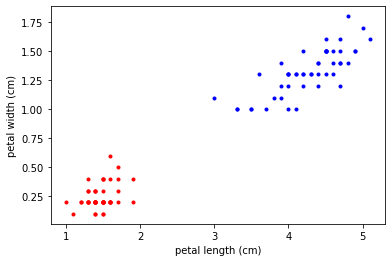

In [39]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'red', marker = '.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color= 'blue', marker = '.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')



Now let us train our model using sklearn train test and split

In [45]:
x = df.drop(['target','flower name'], axis = 'columns')
y = df.target

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2)


len(x_train)







120

In [51]:
len(x_test)

30

In [83]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [80]:
model.score(x_test,y_test)

0.8666666666666667

Tune parameters

**1. Regularization (C)**

In [85]:
model_C = SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

0.8666666666666667

**2.Gamma**


In [86]:
model_G = SVC(gamma=10)
model_G.fit(x_train, y_train)
model_G.score(x_test, y_test)

0.9333333333333333

**3. Kernel**

In [88]:
model_k = SVC(kernel='linear')
model_k.fit(x_train, y_train)
model_k.score(x_test, y_test)

1.0